## How well do jobs and skills pay for Data Analysts

### Methodology

1. Evaluate median salary for the top 3 data roles
2. Find the median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [10]:
!pip install datasets



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("lukebarousse/data_jobs", split="train")

# Convert to a pandas DataFrame
df = dataset.to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df.job_posted_date )
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

# Display the first few rows
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [55]:
df_ng.info()
#df_ng

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 78381 to 777877
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        12 non-null     object        
 1   job_title              12 non-null     object        
 2   job_location           12 non-null     object        
 3   job_via                12 non-null     object        
 4   job_schedule_type      12 non-null     object        
 5   job_work_from_home     12 non-null     bool          
 6   search_location        12 non-null     object        
 7   job_posted_date        12 non-null     datetime64[ns]
 8   job_no_degree_mention  12 non-null     bool          
 9   job_health_insurance   12 non-null     bool          
 10  job_country            12 non-null     object        
 11  salary_rate            12 non-null     object        
 12  salary_year_avg        12 non-null     float64       
 13  sala

In [12]:
#filter for Nigeria data analyst roles
df_ng = df[df['job_country'] == 'Nigeria'].dropna(subset = ['salary_year_avg'])

In [28]:
job_titles = df_ng.job_title_short.value_counts().index[:3].tolist()
job_titles

['Business Analyst', 'Data Analyst', 'Data Scientist']

In [29]:
df_ng_top3 = df_ng[df_ng['job_title_short'].isin(job_titles)]

In [30]:
#Order the job_titles by avg salary
job_order = df_ng_top3.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index


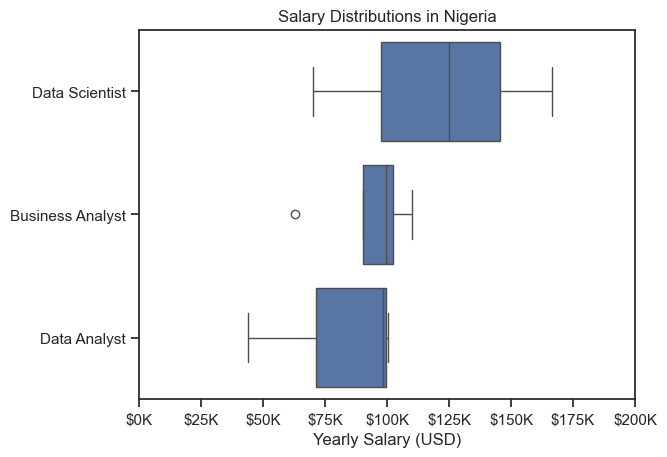

In [31]:
#Create a boxplot
sns.boxplot(data = df_ng_top3, x = 'salary_year_avg', y = 'job_title_short', order = job_order)
sns.set_theme(style = 'ticks')

plt.title('Salary Distributions in Nigeria')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 200000)

# Format x-axis labels as thousands 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## What is the Most Optimal Skill to Learn for Data Analysts?

##### Investigate Median Salary vs Skill for Data Analyst

In [32]:
#filter for Nigeria data analyst roles

df_da_ng = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'Nigeria')].copy()
df_da_ng = df_da_ng.dropna(subset = ['salary_year_avg']) #to drop null values in salaty_year_avg

In [36]:
df_da_ng= df_da_ng.explode('job_skills')

In [65]:
df_da_top_pay = df_da_ng.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)
df_da_top_pay = df_da_top_pay.head(20)
df_da_top_pay

,count,median
job_skills,,
excel,1,100500.0
javascript,1,100500.0
spss,1,100500.0
sas,2,100500.0
bigquery,1,98500.0
gdpr,1,98500.0
azure,1,98500.0
aws,1,98500.0
sql,3,98500.0


In [85]:
#To get a dataframe with themost popular skills in it
df_da_skills = df_da_ng.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count',  ascending = False)
df_da_skills = df_da_skills.head(20).sort_values(by = 'median', ascending = False)
df_da_skills

,count,median
job_skills,,
sas,2,100500.0
excel,1,100500.0
spss,1,100500.0
javascript,1,100500.0
azure,1,98500.0
gdpr,1,98500.0
aws,1,98500.0
sql,3,98500.0
tableau,1,98500.0


(0.0, 105525.0)

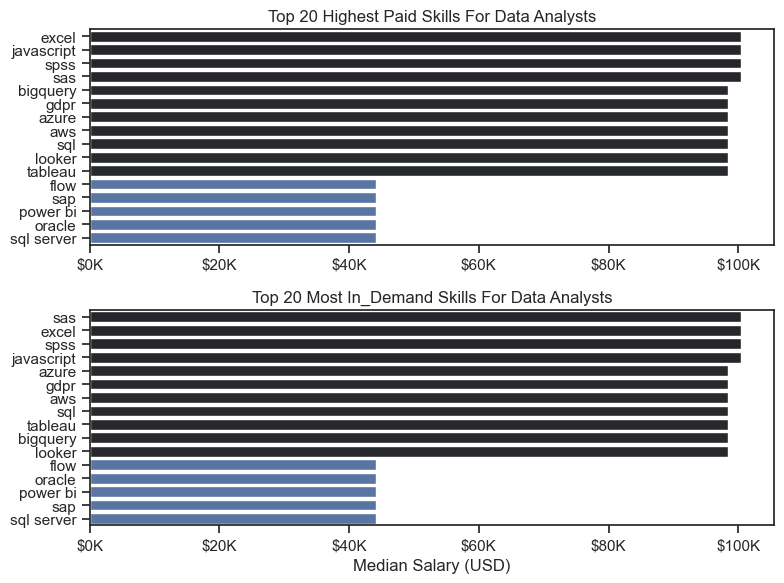

In [79]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
sns.set_theme(style="ticks")


# FOR TOP PAY
sns.barplot(data =df_da_top_pay, x = 'median', y = df_da_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')   #-----  _r is to reverse the arrangement of the color
ax[0].legend().remove()


#formating
ax[0].set_title('Top 20 Highest Paid Skills For Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
#to format x axis to k instead of thousand
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# FOR TOP SKILLS
sns.barplot(data =df_da_skills, x = 'median', y = df_da_skills.index, ax = ax[1], hue = 'median', palette = 'dark:b_r')
ax[1].legend().remove()

#formating
ax[1].set_title('Top 20 Most In_Demand Skills For Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
#to format x axis to k instead of thousand
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
#plt.subplots_adjust(hspace=0.35)  # Increase space between subplots

#make the axis thesame
ax[1].set_xlim(ax[0].get_xlim())